In [2]:
import cv2
import albumentations as A
from matplotlib import pyplot as plt

temp_array = cv2.imread("datasets/classification/detect_lvi/train/LVI_positive/112_LVI_positive_11.png", cv2.IMREAD_UNCHANGED)
temp_array = cv2.cvtColor(temp_array, cv2.COLOR_BGR2RGB)
print(temp_array.shape)

(1024, 1024, 3)


In [29]:
import albumentations as A

class ClassifyaugumentationPolicy():
    def __init__(self, augumentation_proba, positinal, noise, brightness):

        if positinal:
            positinal_proba = 0.5
        else:
            positinal_proba = 0
        if noise:
            noise_proba = 0.5
        else:
            noise_proba = 0
        if brightness:
            brightness_proba = 0.5
        else:
            brightness_proba = 0
        
        positional_transform = A.OneOf([
            A.HorizontalFlip(p=1),
            A.VerticalFlip(p=1),
            A.Transpose(p=1),
            A.RandomRotate90(p=1)
        ], p=positinal_proba)

        noise_transform = A.OneOf([
            A.Blur(blur_limit=(2, 2), p=1),
            A.GaussNoise(var_limit=(0.01, 5), p=1),
        ], p=noise_proba)

        brightness_value = 0.1
        brightness_contrast_transform = A.OneOf([
            A.RandomBrightnessContrast(
                brightness_limit=(-brightness_value, brightness_value), contrast_limit=(-brightness_value, brightness_value), p=1),
        ], p=brightness_proba)
        
        final_transform = A.Compose([
            positional_transform,
            noise_transform,
            brightness_contrast_transform,
        ], p=augumentation_proba)

        if augumentation_proba:
            self.transform = lambda image_array: \
                final_transform(image=image_array)['image']
        else:
            self.transform = lambda image_array: image_array

    def __call__(self, image_array):
        image_transformed_array = self.transform(image_array)
        return image_transformed_array

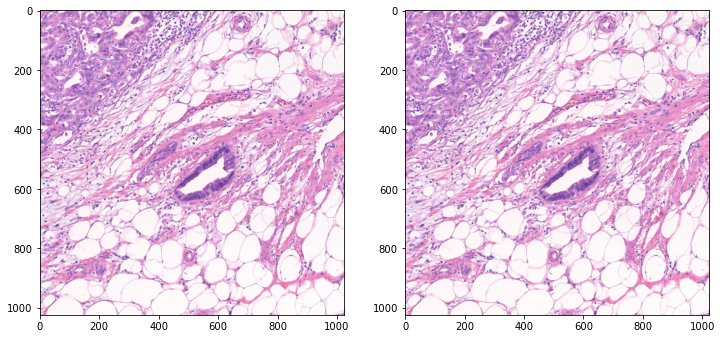

In [31]:
temp_array = cv2.imread("datasets/classification/detect_lvi/train/LVI_positive/112_LVI_positive_11.png", cv2.IMREAD_UNCHANGED)
temp_array = cv2.cvtColor(temp_array, cv2.COLOR_BGR2RGB)

argument_method = ClassifyaugumentationPolicy(augumentation_proba=1,
                                              positinal=False, 
                                               noise=True, 
                                               brightness=False)

argumented_array = argument_method(temp_array)

_, ax = plt.subplots(1, 2, figsize=(12, 12))

ax[0].imshow(temp_array)
ax[1].imshow(argumented_array)

In [ ]:
class ClassifyaugumentationPolicy():
    def __init__(self, augumentation_proba):

        positional_transform = A.OneOf([
            A.HorizontalFlip(p=1),
            A.VerticalFlip(p=1),
            A.Transpose(p=1),
            A.RandomRotate90(p=1)
        ], p=0.5)

        noise_transform = A.OneOf([
            A.Blur(blur_limit=(2, 2), p=1),
            A.GaussNoise(var_limit=(0.01, 5), p=1),
        ], p=0.5)

        brightness_value = 0.1
        brightness_contrast_transform = A.OneOf([
            A.RandomBrightnessContrast(
                brightness_limit=(-brightness_value, brightness_value), contrast_limit=(-brightness_value, brightness_value), p=1),
        ], p=0.5)

        final_transform = A.Compose([
            positional_transform,
            noise_transform,
            brightness_contrast_transform,
        ], p=augumentation_proba)

        if augumentation_proba:
            self.transform = lambda image_array: \
                final_transform(image=image_array)['image']
        else:
            self.transform = lambda image_array: image_array

    def __call__(self, image_array):
        image_transformed_array = self.transform(image_array)
        return image_transformed_array